In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
data = pd.read_csv(r"C:\Users\yuvas\OneDrive\Attachments\Documents\Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# General Information
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
# Fill missing values in 'Age' with the median
data['Age'] = data['Age'].fillna(data['Age'].median())

# Fill missing values in 'Embarked' with the mode
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])


In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Encoding Categorical Variables
# Convert 'Sex' into numerical values: male = 0, female = 1
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' into numerical values: C = 0, Q = 1, S = 2
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Feature Engineering: Create 'FamilySize' from 'SibSp' + 'Parch'
data['FamilySize'] = data['SibSp'] + data['Parch']

# Fare Normalization: Apply log transformation to 'Fare' to handle skewness
data['Fare'] = np.log1p(data['Fare'])  # log1p handles log(0) by adding 1

In [8]:
duplicates = data.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Display duplicate rows, if any
if duplicates.sum() > 0:
    print("Duplicate rows:")
    print(data[data.duplicated()])

Number of duplicate rows: 0


In [9]:
# 1. Descriptive Statistics
print("Descriptive Statistics:")
print(data.describe())  # For numerical columns
print("\nCategorical Value Counts:")
print(data['Pclass'].value_counts())
print(data['Sex'].value_counts())
print(data['Embarked'].value_counts())

Descriptive Statistics:
       PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642    0.352413   29.361582   
std     257.353842    0.486592    0.836071    0.477990   13.019697   
min       1.000000    0.000000    1.000000    0.000000    0.420000   
25%     223.500000    0.000000    2.000000    0.000000   22.000000   
50%     446.000000    0.000000    3.000000    0.000000   28.000000   
75%     668.500000    1.000000    3.000000    1.000000   35.000000   
max     891.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch        Fare    Embarked  FamilySize  
count  891.000000  891.000000  891.000000  891.000000  891.000000  
mean     0.523008    0.381594    2.962246    1.536476    0.904602  
std      1.102743    0.806057    0.969048    0.791503    1.613459  
min      0.000000    0.000000    0.000000    0.000000    0.000000  
25%  

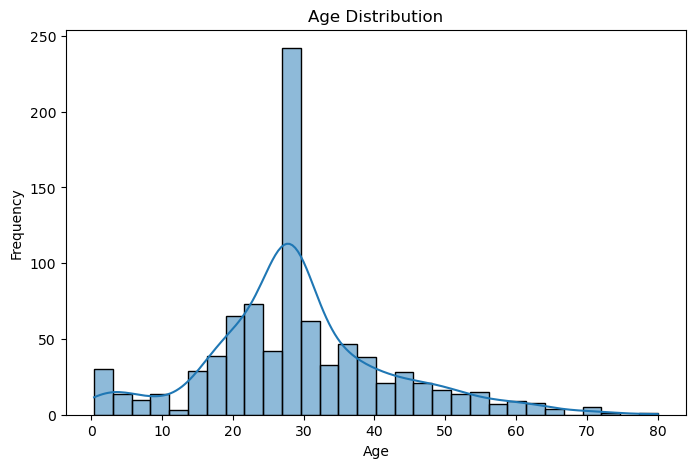

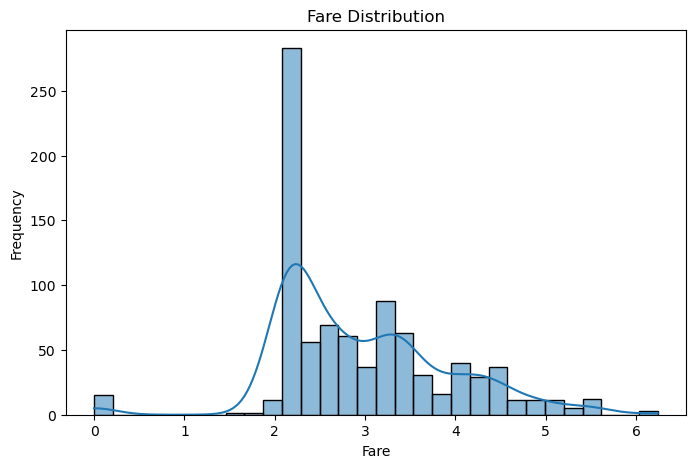

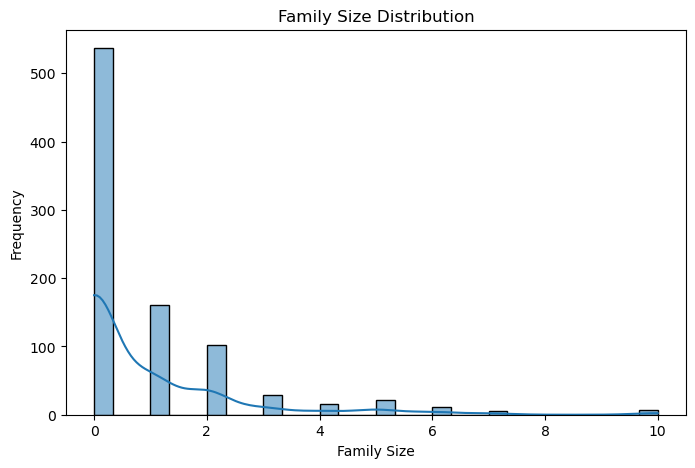

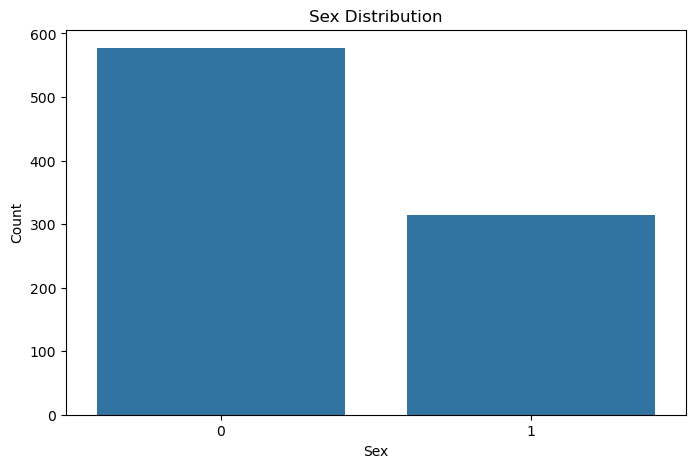

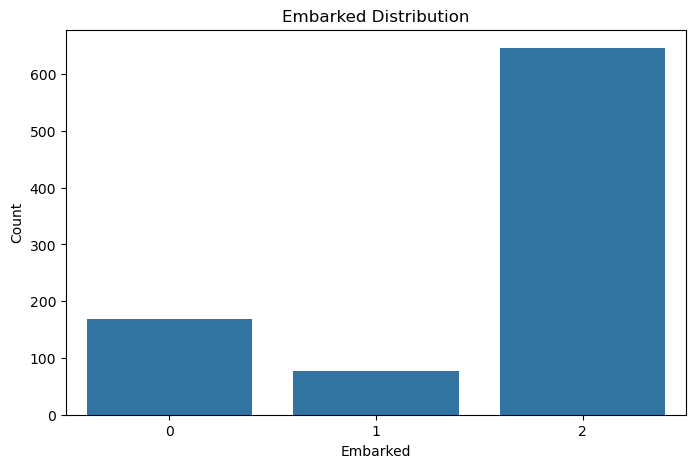

In [10]:
## Plotting histograms for numerical features
# Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Fare Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['Fare'], kde=True, bins=30)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# FamilySize Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['FamilySize'], kde=True, bins=30)
plt.title('Family Size Distribution')
plt.xlabel('Family Size')
plt.ylabel('Frequency')
plt.show()

# Sex Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Sex')
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Embarked Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Embarked')
plt.title('Embarked Distribution')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

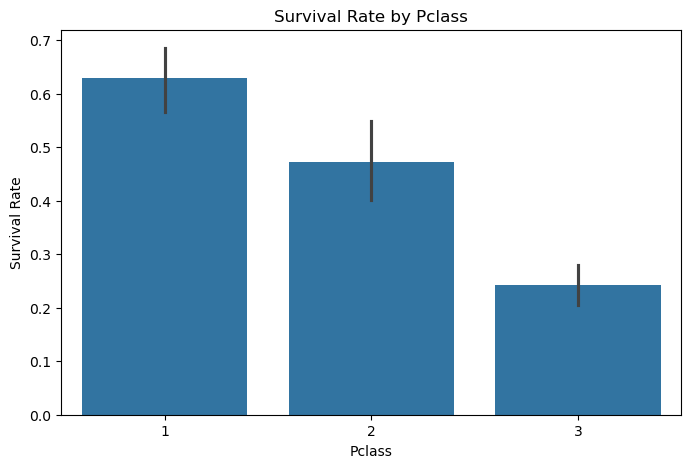

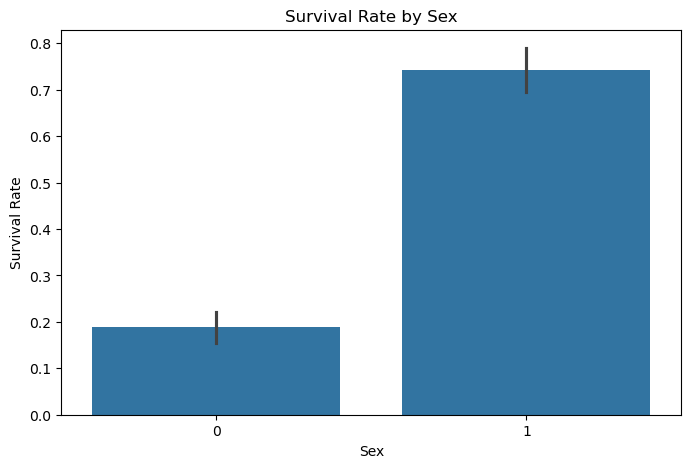

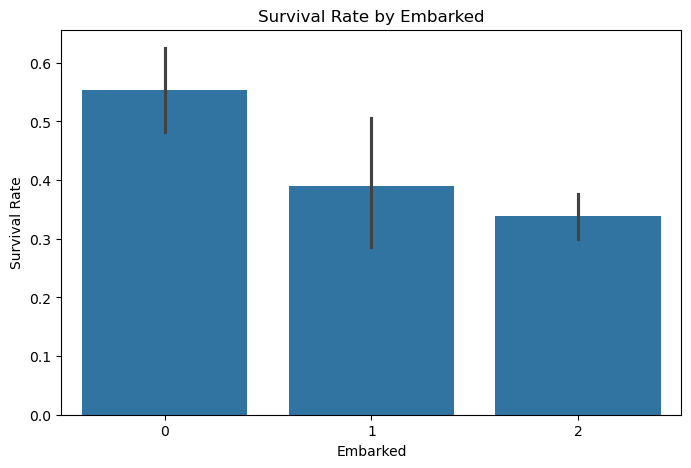

In [11]:
# 3. Bivariate Analysis (Target Variable: Survived)

# Survival by Pclass
plt.figure(figsize=(8, 5))
sns.barplot(data=data, x='Pclass', y='Survived')
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.show()

# Survival by Sex
plt.figure(figsize=(8, 5))
sns.barplot(data=data, x='Sex', y='Survived')
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

# Survival by Embarked
plt.figure(figsize=(8, 5))
sns.barplot(data=data, x='Embarked', y='Survived')
plt.title('Survival Rate by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')
plt.show()

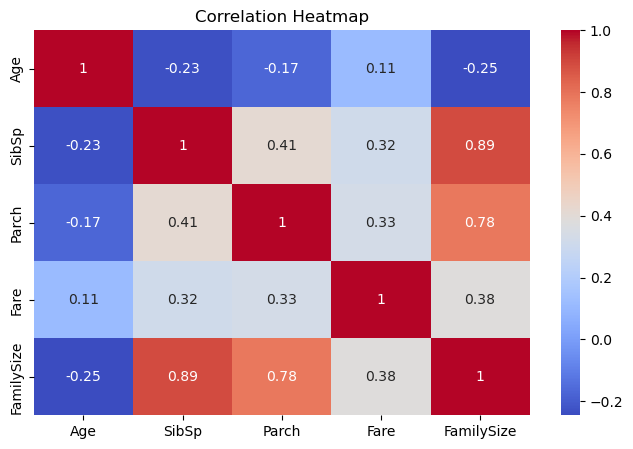

In [12]:
# 4. Correlation Heatmap

# Select numerical columns to see correlations
corr = data[['Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

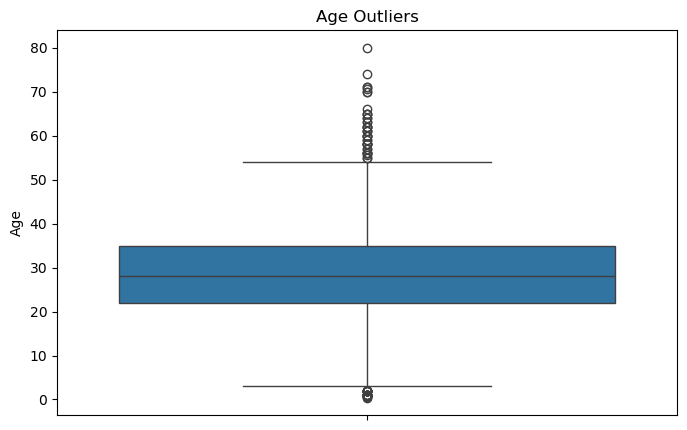

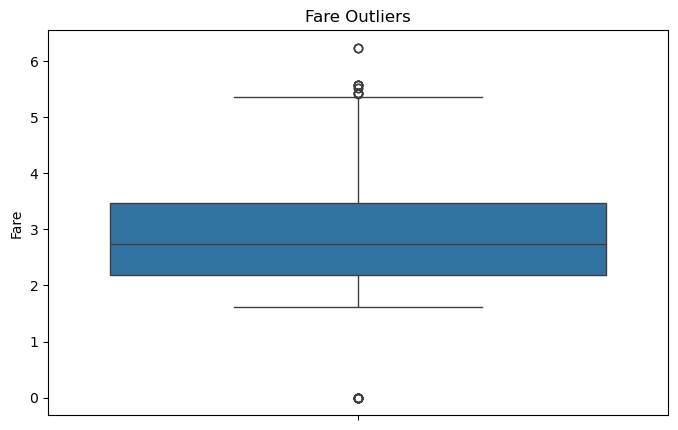

In [13]:
# 5. Outlier Detection

# Outliers in Age (using boxplot)
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, y='Age')
plt.title('Age Outliers')
plt.show()

# Outliers in Fare (using boxplot)
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, y='Fare')
plt.title('Fare Outliers')
plt.show()

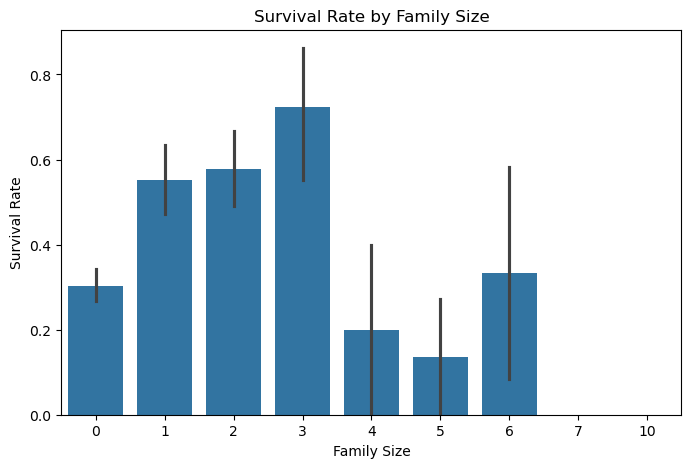

In [14]:
# 6. Advanced Feature Engineering (Exploring Feature Relationships)

# FamilySize vs. Survival Rate
plt.figure(figsize=(8, 5))
sns.barplot(data=data, x='FamilySize', y='Survived')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

In [15]:
# 7. Data Preparation for Modeling (Splitting X and y)

# Features (X) and Target (y)
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize']]
y = data['Survived']

In [16]:
# Show first few rows of data and target variable
print("Features (X) Sample:")
print(X.head())
print("\nTarget (y) Sample:")
print(y.head())

Features (X) Sample:
   Pclass  Sex   Age  SibSp  Parch      Fare  Embarked  FamilySize
0       3    0  22.0      1      0  2.110213         2           1
1       1    1  38.0      1      0  4.280593         0           1
2       3    1  26.0      0      0  2.188856         2           0
3       1    1  35.0      1      0  3.990834         2           1
4       3    0  35.0      0      0  2.202765         2           0

Target (y) Sample:
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [17]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8212290502793296
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       105
           1       0.78      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179



In [23]:
# Feature scaling (important for Logistic Regression)
scaler = StandardScaler()
X_train[['Age', 'Fare']] = scaler.fit_transform(X_train[['Age', 'Fare']])
X_test[['Age', 'Fare']] = scaler.transform(X_test[['Age', 'Fare']])

# Initialize Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7988826815642458
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [31]:
#hyper parameter tuning for Random forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the corrected parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],              # Number of trees in the forest
    'max_depth': [5, 10, 20, None],               # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],              # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],                # Minimum samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None]       # Corrected 'max_features' options
}

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1, scoring='accuracy')

# Fit the grid search model
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_rf_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the optimized model on the test set
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Optimized Random Forest Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Optimized Random Forest Accuracy: 0.8100558659217877
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



In [45]:
#hyper parameter tuning for Logistic Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters to tune
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 200, 300],
    'penalty': ['l1', 'l2'],  # Both penalties
    'solver': ['liblinear']  # Use liblinear when 'l1' is selected
}

# Additional grid for 'l2' penalty, as 'l2' works with 'newton-cg' and 'lbfgs'
param_grid_l2 = {
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 200, 300],
    'penalty': ['l2'],
    'solver': ['newton-cg', 'lbfgs']
}

# Combine both grids
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression()

# First grid search for 'l1' penalty
grid_search_l1 = GridSearchCV(estimator=log_reg_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search_l1.fit(X_train, y_train)

# Second grid search for 'l2' penalty
grid_search_l2 = GridSearchCV(estimator=log_reg_model, param_grid=param_grid_l2, cv=5, n_jobs=-1, verbose=1)
grid_search_l2.fit(X_train, y_train)

# Get the best parameters from both searches
best_params_l1 = grid_search_l1.best_params_
best_params_l2 = grid_search_l2.best_params_

# Output the best parameters
print(f"Best Parameters for 'l1' penalty: {best_params_l1}")
print(f"Best Parameters for 'l2' penalty: {best_params_l2}")

# Train with the best parameters from either search
if grid_search_l1.best_score_ > grid_search_l2.best_score_:
    best_log_reg_model = grid_search_l1.best_estimator_
else:
    best_log_reg_model = grid_search_l2.best_estimator_

# Evaluate the optimized model
y_pred_optimized = best_log_reg_model.predict(X_test)
print(f"Optimized Accuracy: {accuracy_score(y_test, y_pred_optimized)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_optimized))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters for 'l1' penalty: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Parameters for 'l2' penalty: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Optimized Accuracy: 0.7877094972067039
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.77      0.69      0.73        74

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



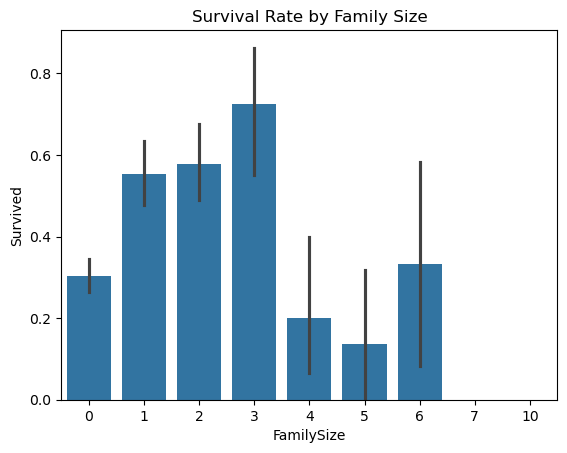

In [35]:
# Does having a large family impact survival?
#Family Size and Survival
sns.barplot(data=data, x='FamilySize', y='Survived')
plt.title('Survival Rate by Family Size')
plt.show()


In [37]:
# Feature importance
feature_importances = model.feature_importances_
features = X.columns

# Display the importance of each feature
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)


Feature Importance:
      Feature  Importance
1         Sex    0.269864
5        Fare    0.268581
2         Age    0.243483
0      Pclass    0.075100
7  FamilySize    0.050612
6    Embarked    0.032852
3       SibSp    0.032807
4       Parch    0.026700
